## Практическое занятие - Метод k-ближайших соседей для решения задачи классификации

Цель состоит в том, чтобы определить сегменты клиентов, которым может быть предоставлен кредит. Основная цель состоит в том, чтобы проанализировать и спрогнозировать, будет ли предоставление кредита конкретному лицу безопасным или нет, исходя из конкретных особенностей.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

**1. Загрузите данные (файл train_knn.csv)**

In [2]:
drive.mount('/content/drive')
data = pd.read_csv('train_knn.csv')

print("\nРазмерность:", data.shape)
print("\nLoan_ID - ID")
print("Gender - Пол")
print("Married - Женат ли")
print("Dependents - Иждивенцы")
print("Education - Образование")
print("Self_Employed - Самозанятый")
print("ApplicantIncome - Доход заявителя")
print("CoapplicantIncome - Сопутствующий доход")
print("LoanAmount - Сумма займа")
print("Loan_Amount_Term - Сумма займа Срок")
print("Credit_History - Кредитная история")
print("Property_Area - Свойство местности")
print("Loan_Status - Статус займа\n")

display(data.head(10))

Mounted at /content/drive

Размерность: (614, 13)

Loan_ID - ID
Gender - Пол
Married - Женат ли
Dependents - Иждивенцы
Education - Образование
Self_Employed - Самозанятый
ApplicantIncome - Доход заявителя
CoapplicantIncome - Сопутствующий доход
LoanAmount - Сумма займа
Loan_Amount_Term - Сумма займа Срок
Credit_History - Кредитная история
Property_Area - Свойство местности
Loan_Status - Статус займа



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


**2. Осуществите поиск пропущенных значений**

In [3]:
display("data:", data.isnull().sum())

'data:'

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


**3. Заполните пропуски в данных: для признаков Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, Credit_History - модой, для LoanAmount - средним значением.**

In [4]:
# Заполнение пропусков для категориальных признаков - модой
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)

# Для числового признака LoanAmount - средним
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

display("data:", data.isnull().sum())

'data:'

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**4. Удалите признак Loan_ID**

In [5]:
data.drop('Loan_ID', axis=1, inplace=True)

print("\nРазмерность:", data.shape)
display(data.head(5))


Размерность: (614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


#  Разведочный анализ данных

**5. Осуществите проверку дубликатов**

In [6]:
duplicates = data.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")
if duplicates > 0:
    data.drop_duplicates(inplace=True)

Количество дубликатов: 0


**6. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям разного пола**

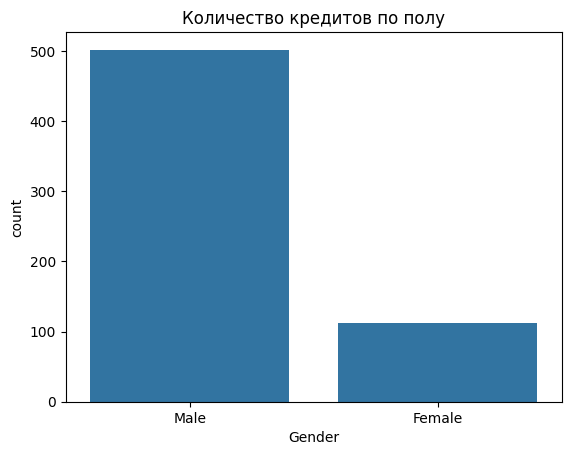

In [7]:
sns.countplot(x='Gender', data=data)
plt.title('Количество кредитов по полу')
plt.show()

**7. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям с разным семейным положением**

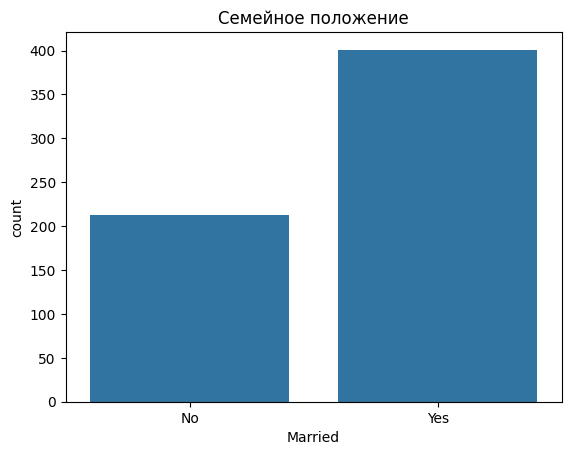

In [8]:
sns.countplot(x='Married', data=data)
plt.title('Семейное положение')
plt.show()

**8. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям с разным уровнем образования**

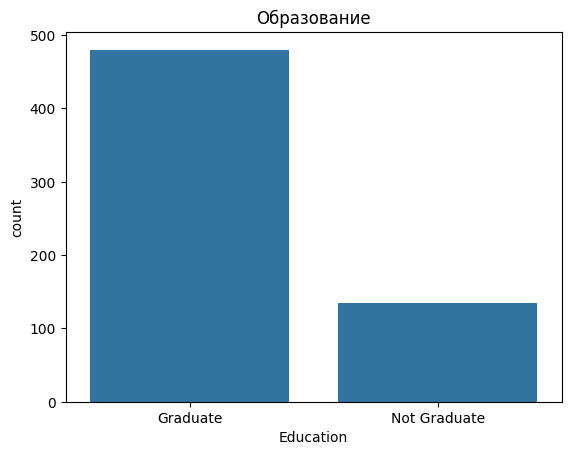

In [9]:
sns.countplot(x='Education', data=data)
plt.title('Образование')
plt.show()

**9. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям с разной самозанятостью**

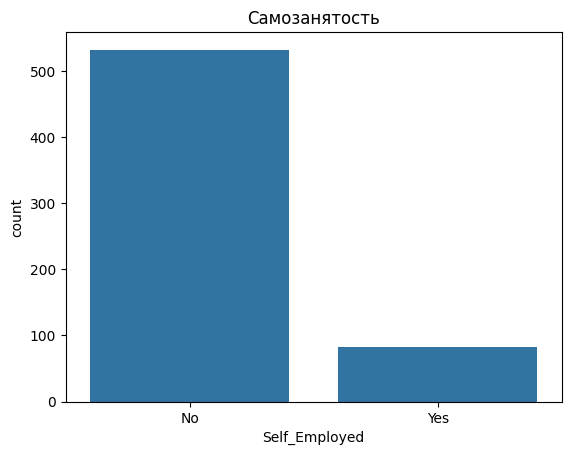

In [10]:
sns.countplot(x='Self_Employed', data=data)
plt.title('Самозанятость')
plt.show()

**10. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям с разной кредитной историей**

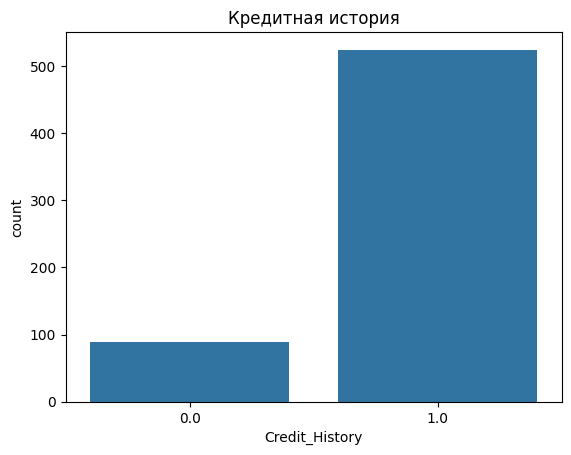

In [11]:
sns.countplot(x='Credit_History', data=data)
plt.title('Кредитная история')
plt.show()

**11. С помощью sns.countplot выведите диаграмму количества кредитов, выданных людям, проживающим в разной местности**

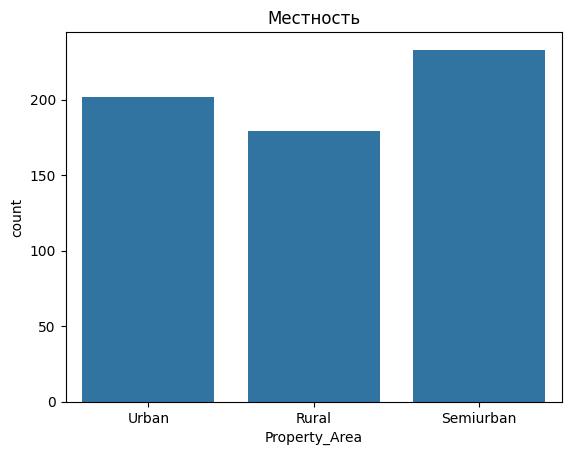

In [12]:
sns.countplot(x='Property_Area', data=data)
plt.title('Местность')
plt.show()

**11.2 Посчитайте и проанализируйте долю значений целевой переменной от общего объема выборки**

In [13]:
target_counts = data['Loan_Status'].value_counts(normalize=True)
print("Доля значений целевой переменной:\n", target_counts)

Доля значений целевой переменной:
 Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


**12. С помощью sns.distplot постройте распределение для признака ApplicantIncome**

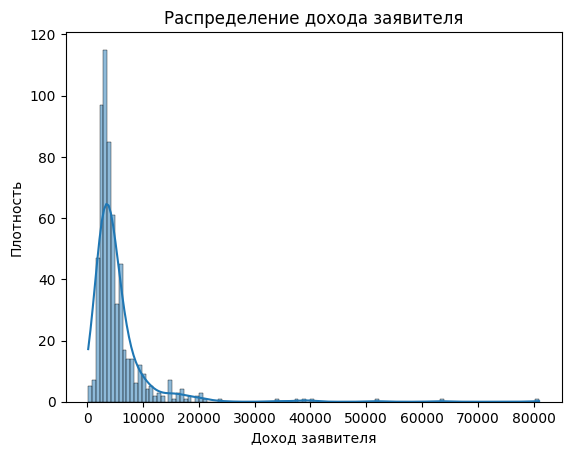

In [14]:
sns.histplot(data['ApplicantIncome'], kde=True)
plt.title('Распределение дохода заявителя')
plt.xlabel('Доход заявителя')
plt.ylabel('Плотность')
plt.show()

**13. Удалите выбросы из данных**

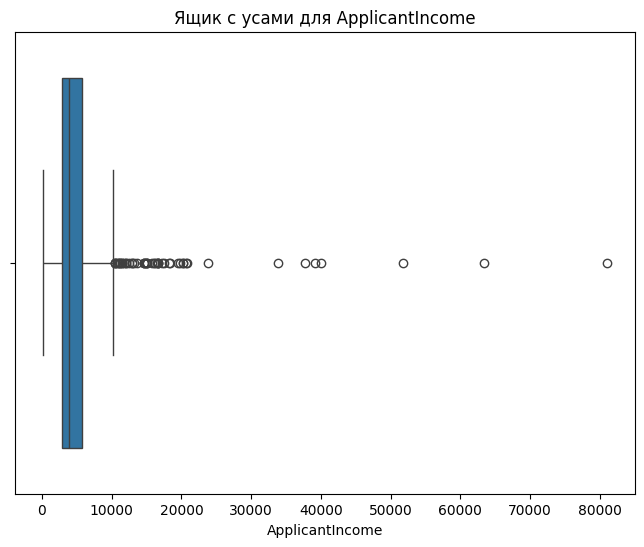

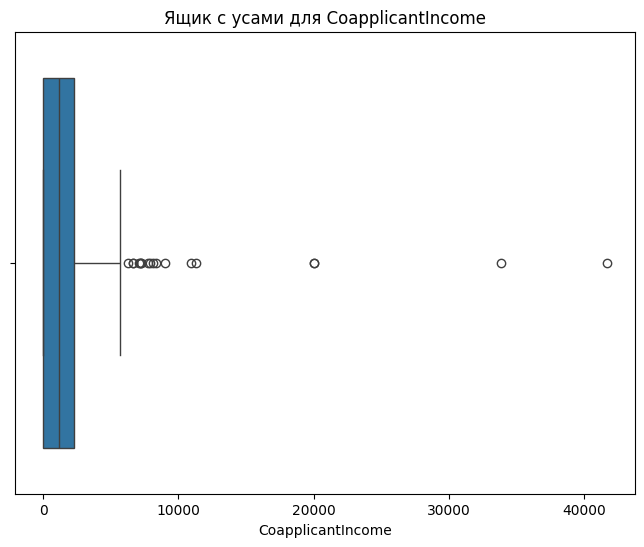

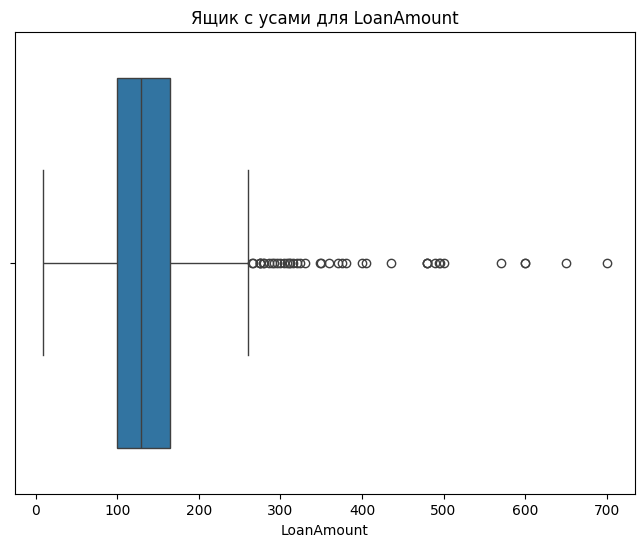

In [15]:
numeric_features = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount"
]

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Ящик с усами для {feature}')
    plt.show()

ApplicantIncome: удалено выбросов. Размер данных до: (614, 12), после: (564, 12)
CoapplicantIncome: удалено выбросов. Размер данных до: (564, 12), после: (548, 12)
LoanAmount: удалено выбросов. Размер данных до: (548, 12), после: (520, 12)


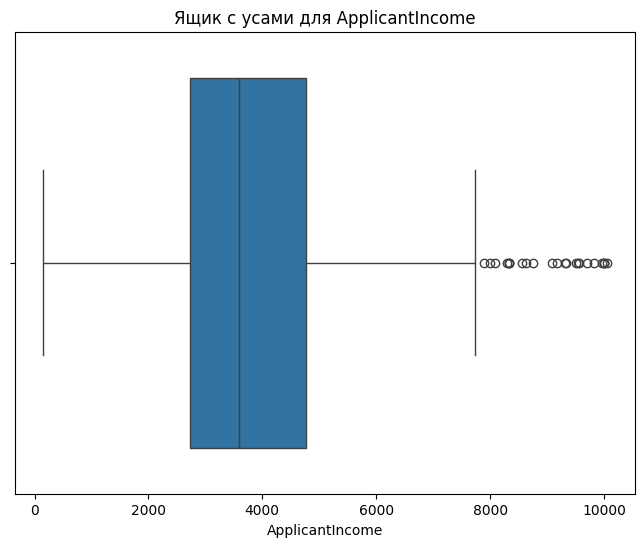

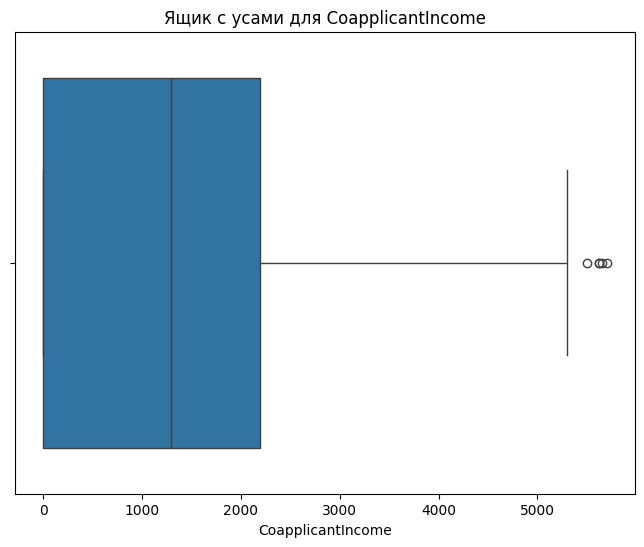

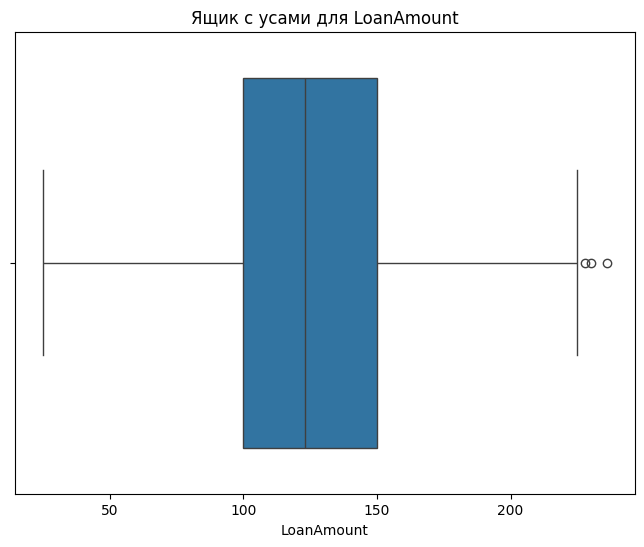

In [16]:
features = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount"
]

for feature in features:
    # Проверяем, числовой ли признак
    if data[feature].dtype in ['int64', 'float64']:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        initial_shape = data.shape
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
        final_shape = data.shape
        print(f"{feature}: удалено выбросов. Размер данных до: {initial_shape}, после: {final_shape}")
    else:
        print(f"{feature}: не числовой признак, пропускаем.")

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Ящик с усами для {feature}')
    plt.show()

**14. Постройте и визуализируйте с помощью sns.heatmap матрицу корреляций**

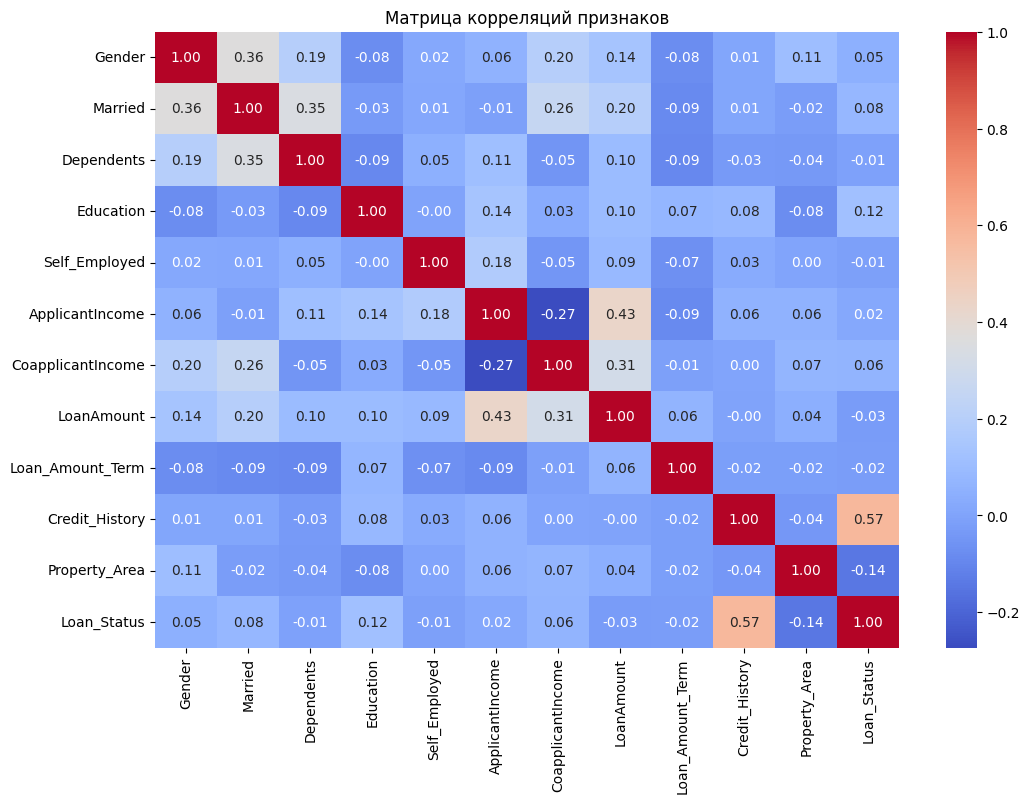

In [17]:
data_numeric = data
mapping_gender = {'Female': 0, 'Male': 1}
mapping_yes_no = {'No': 0, 'Yes': 1}
mapping_dependents = {'0': 0, '1': 1, '2': 2, '3+': 3}
mapping_education = {'Not Graduate': 0, 'Graduate': 1}
mapping_property = {'Semiurban': 0, 'Urban': 1, 'Rural': 2}
mapping_loan_status = {'N': 0, 'Y': 1}

data['Gender'] = data['Gender'].map(mapping_gender)
data['Married'] = data['Married'].map(mapping_yes_no)
data['Dependents'] = data['Dependents'].map(mapping_dependents)
data['Education'] = data['Education'].map(mapping_education)
data['Self_Employed'] = data['Self_Employed'].map(mapping_yes_no)
data['Property_Area'] = data['Property_Area'].map(mapping_property)
data['Credit_History'] = data['Credit_History'].astype(int)
data['Loan_Status'] = data['Loan_Status'].map(mapping_loan_status)

corr_matrix = data_numeric.select_dtypes(include=['number']).corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляций признаков')
plt.show()

# Построение модели

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

**15. Переконвертируйте следующие категориальные данные в целочисленные значения**

In [19]:
#Convert some object data type to int
# gender = {"Female": 0, "Male": 1}
# yes_no = {'No' : 0,'Yes' : 1}
# dependents = {'0':0,'1':1,'2':2,'3+':3}
# education = {'Not Graduate' : 0, 'Graduate' : 1}
# property = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
# output = {"N": 0, "Y": 1}

# ВЫПОЛНЕНО НА ЭТАПЕ ПОСТРОЕНИЯ МАТРИЦЫ КОРЕЛЯЦИИ
display(data.head(5))

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1,1,1


**16. Назначьте целевой переменной Loan_Status, удалите её из данных. Разбейте выборку на обучающую и тестовую в соотношении 75% на 25%.**

In [20]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**17. Создайте и обучите модель KNeighborsClassifier с параметром n_neighbors = 5**

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Модель обучена")

Модель обучена


**18. Выполните предсказания модели на тестовой выборке**

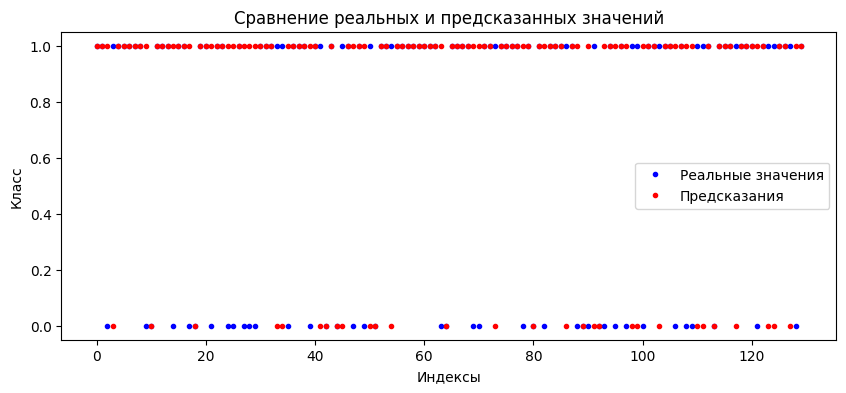

In [22]:
y_pred = knn.predict(X_test)

# Визуализируем сравнение реальных и предсказанных значений
plt.figure(figsize=(10,4))
plt.plot(range(len(y_test)), y_test, 'b.', label='Реальные значения')
plt.plot(range(len(y_pred)), y_pred, 'r.', label='Предсказания')
plt.xlabel('Индексы')
plt.ylabel('Класс')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.show()

**19. Выведите accuracy_score модели для тестовой выборки**

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.62


**20. Постройте и выведите матрицу ошибок (Confusion Matrix)**

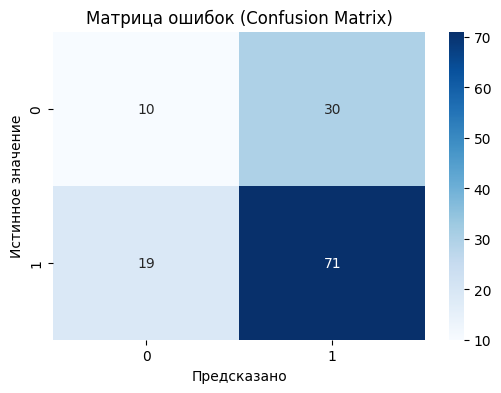

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказано')
plt.ylabel('Истинное значение')
plt.show()